# Train데이터 불러오기

각 년도별 DataFrame을 리스트에 append합니다.

리스트 인덱스별로

0: 2017년도 데이터   

1: 2018년도 데이터 

2: 2019년도 데이터 

3: 202년도 데이터 

입니다

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import warnings

RANDOM_STATE = 42
np.seed = 42
DATA_PATH = "../data_0112/"

warnings.filterwarnings(action='ignore')
PATH_2017 = DATA_PATH + "train/KNOW_2017.csv"
PATH_2018 = DATA_PATH + "train/KNOW_2018.csv"
PATH_2019 = DATA_PATH + "train/KNOW_2019.csv"
PATH_2020 = DATA_PATH + "train/KNOW_2020.csv"

paths = [PATH_2017, PATH_2018, PATH_2019, PATH_2020]

know_train = [pd.read_csv(path) for path in paths]

In [2]:
know_train[0].head() # 2017년도 샘플

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,...,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt,knowcode
0,0,3,3,3,3,3,3,4,4,3,...,0,0,0,0,0,0,1,0,3,825101
1,1,4,5,4,5,3,4,3,4,3,...,0,0,0,0,0,0,0,0,1,140204
2,2,3,4,3,4,3,4,5,6,4,...,0,0,0,0,0,0,0,0,1,140204
3,3,3,3,3,3,3,5,4,5,4,...,0,0,0,0,0,0,0,0,0,140601
4,4,4,5,3,4,3,4,4,5,3,...,0,0,0,0,0,0,0,0,1,140204


# 전처리 

`data_0112`는 이미 전처리된 데이터

## 라벨 인코딩

숫자로 변환할 수 있는 컬럼은 라벨 인코딩을 사용하지 않았습니다.

string이나 object컬럼은 라벨인코더를 이용해 변환하였으며 추후 test셋에 사용해야하기 때문에 년도별, 컬럼별로 dictionary를 이용해 저장하였습니다

In [3]:
from sklearn.preprocessing import LabelEncoder
years = ['2017', '2018', '2019', '2020']

year_encoder = {}

for year, df in zip(years, know_train):
    print(year)
    encoders = {}
    
    for col in df.columns:
        if col == 'idx':
            print("HEHE")
            continue
        
        try:
            df[col] = df[col].map(int)
        except:
            encoder = LabelEncoder()
            df[col] = df[col].map(str)
            df[col] = encoder.fit_transform(df[col])
            encoders[col] = encoder
            
            
    year_encoder[year] = encoders

2017
HEHE
2018
HEHE
2019
HEHE
2020
HEHE


In [4]:
know_train[0]

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,...,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt,knowcode
0,0,3,3,3,3,3,3,4,4,3,...,0,0,0,0,0,0,1,0,3,825101
1,1,4,5,4,5,3,4,3,4,3,...,0,0,0,0,0,0,0,0,1,140204
2,2,3,4,3,4,3,4,5,6,4,...,0,0,0,0,0,0,0,0,1,140204
3,3,3,3,3,3,3,5,4,5,4,...,0,0,0,0,0,0,0,0,0,140601
4,4,4,5,3,4,3,4,4,5,3,...,0,0,0,0,0,0,0,0,1,140204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,9481,3,5,2,4,3,3,2,2,2,...,1,0,0,0,0,0,0,0,3,411301
9482,9482,5,5,5,5,5,5,3,4,4,...,0,0,0,0,0,0,0,0,4,151105
9483,9483,3,3,4,6,3,3,4,5,4,...,0,0,0,0,0,0,0,0,3,701101
9484,9484,3,5,3,5,4,5,3,4,3,...,0,0,0,0,0,0,0,0,3,25402


In [5]:
know_train[1]

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt,knowcode
0,9486,5,3,4,2,2,5,4,5,4,...,0,0,0,0,0,0,0,0,3,306301
1,9487,4,3,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,1,133204
2,9488,4,1,5,3,3,4,2,4,1,...,0,0,0,1,0,0,0,0,1,702502
3,9489,4,3,4,4,4,3,3,2,3,...,0,0,0,0,0,0,0,0,0,121201
4,9490,3,2,3,1,1,4,3,4,3,...,0,0,0,0,0,0,0,0,1,306301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,18564,5,5,5,2,2,4,2,5,3,...,0,0,0,0,0,0,0,0,3,303002
9068,18565,5,5,5,3,3,5,4,4,4,...,0,0,0,0,0,0,0,0,4,615203
9069,18566,4,4,4,3,3,5,4,4,4,...,0,0,0,0,0,0,0,0,4,301106
9070,18567,5,2,3,2,3,5,4,4,3,...,0,0,0,0,0,0,0,0,2,301112


In [6]:
know_train[2]

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,...,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt,knowcode
0,18569,4,4,4,3,4,4,4,4,4,...,0,0,0,0,0,0,0,0,3,812301
1,18570,4,3,4,4,4,4,3,4,5,...,0,0,0,0,0,0,0,0,1,15201
2,18571,2,3,2,2,2,2,2,2,3,...,0,0,0,0,0,0,0,0,1,901101
3,18572,5,5,5,5,5,5,5,5,5,...,0,0,0,0,0,0,0,0,0,29903
4,18573,1,4,4,1,1,2,4,3,4,...,0,0,0,0,0,0,0,0,1,561401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8550,27122,3,4,4,3,4,3,3,3,3,...,0,0,0,0,0,0,0,0,4,416105
8551,27123,5,5,4,4,4,5,4,4,5,...,0,0,0,0,0,0,0,0,2,531601
8552,27124,3,3,4,4,4,4,4,3,3,...,0,0,0,0,0,0,0,0,3,615301
8553,27125,3,3,3,1,4,4,3,2,3,...,0,0,0,0,0,0,0,0,4,811901


In [7]:
know_train[3]

,idx,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,saq5_1,...,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt,knowcode
0,27127,4,4,4,4,4,5,4,5,3,...,0,0,0,0,0,0,0,0,3,304003
1,27128,5,6,5,6,4,5,4,5,4,...,0,0,0,0,0,0,0,0,1,221401
2,27129,3,4,3,4,3,4,3,5,3,...,0,0,0,0,0,0,0,0,1,815001
3,27130,4,5,2,3,3,3,4,5,3,...,0,0,0,0,0,0,0,0,0,304003
4,27131,5,6,4,5,3,5,4,4,4,...,0,0,0,0,0,0,0,0,1,140201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,35244,4,6,3,5,3,3,1,0,5,...,0,0,0,0,0,0,0,0,2,121105
8118,35245,3,4,4,5,2,4,4,6,1,...,0,0,0,0,0,0,0,0,0,26102
8119,35246,5,6,3,4,3,4,4,5,5,...,0,0,0,0,0,0,0,0,4,31301
8120,35247,5,6,5,5,4,5,3,3,3,...,0,0,0,0,0,0,0,0,2,154105


# X, y 구분 및 모델 학습

이번 대회에서 맞춰야 할 값은 knowcode입니다.

ID와 knowcode를 제외한 나머지 feature를 X, knowcode를 정답 y로 두어 모델을 학습하였습니다.

베이스라인에서는 의사결정나무와 랜덤포레스트를 선정하였습니다

df.drop(['idx','knowcode'], axis=1)

In [8]:
train_data = {}
for year, df in zip(years, know_train):
    train_data[year] = {'X': df.drop(['idx','knowcode'], axis=1),
                        'y': df['knowcode']} 

In [9]:
train_data['2017']

{'X':       aq1_1  aq1_2  aq2_1  aq2_2  aq3_1  aq3_2  aq4_1  aq4_2  aq5_1  aq5_2  \
 0         3      3      3      3      3      3      4      4      3      4   
 1         4      5      4      5      3      4      3      4      3      4   
 2         3      4      3      4      3      4      5      6      4      5   
 3         3      3      3      3      3      5      4      5      4      6   
 4         4      5      3      4      3      4      4      5      3      4   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 9481      3      5      2      4      3      3      2      2      2      3   
 9482      5      5      5      5      5      5      3      4      4      5   
 9483      3      3      4      6      3      3      4      5      4      5   
 9484      3      5      3      5      4      5      3      4      3      5   
 9485      3      4      3      4      3      4      3      4      3      4   
 
       ...  의료  한글  교재  시스템  회사원  이용  노트북  생산

In [14]:
know_train[0] = know_train[0][[col for col in know_train[0].columns if col != "것이므"]]
know_train[1] = know_train[1][[col for col in know_train[1].columns if col != "것이므"]]
know_train[2] = know_train[2][[col for col in know_train[2].columns if col != "것이므"]]
know_train[3] = know_train[3][[col for col in know_train[3].columns if col != "것이므"]]

In [15]:
from pycaret.classification import *

In [18]:
clf2017 = setup(know_train[0], target = 'knowcode', 
            #fold = 3,
            ignore_features = ['idx'],
            session_id=RANDOM_STATE,
           )

,Description,Value
0,session_id,42
1,Target,knowcode
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(9486, 268)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,259
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4262,0.0000,0.3850,0.3435,0.3594,0.4208,0.4247
1,0.4187,0.0000,0.3804,0.3389,0.3521,0.4132,0.4170
2,0.4699,0.0000,0.4456,0.3937,0.4057,0.4649,0.4691
3,0.4488,0.0000,0.4089,0.3750,0.3849,0.4435,0.4479
4,0.4307,0.0000,0.3859,0.3490,0.3628,0.4257,0.4292
5,0.4488,0.0000,0.4086,0.3917,0.3931,0.4435,0.4478
6,0.4654,0.0000,0.4162,0.3931,0.4035,0.4604,0.4642
7,0.4518,0.0000,0.4005,0.3755,0.3848,0.4462,0.4514
8,0.4623,0.0000,0.4298,0.3856,0.3971,0.4572,0.4617
9,0.4563,0.0000,0.4299,0.3700,0.3865,0.4516,0.4548


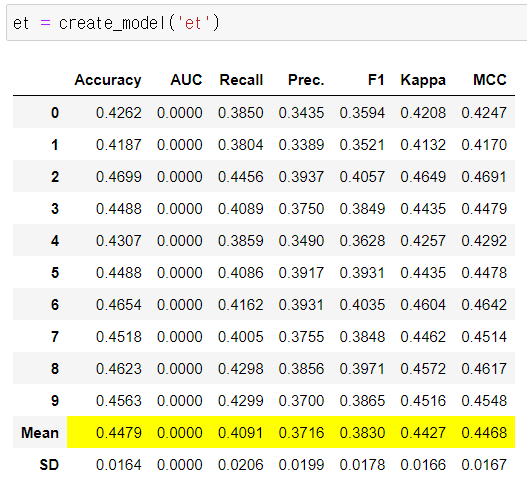

In [20]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2334,0.0000,0.2092,0.1937,0.2008,0.2302,0.2304
1,0.2666,0.0000,0.2415,0.2299,0.2343,0.2633,0.2635
2,0.2560,0.0000,0.2355,0.2285,0.2258,0.2534,0.2536
3,0.2560,0.0000,0.2245,0.2210,0.2240,0.2530,0.2532
4,0.2590,0.0000,0.2330,0.2293,0.2303,0.2564,0.2566
5,0.2636,0.0000,0.2381,0.2292,0.2307,0.2608,0.2610
6,0.2861,0.0000,0.2646,0.2477,0.2528,0.2833,0.2835
7,0.2952,0.0000,0.2657,0.2409,0.2524,0.2921,0.2923
8,0.2771,0.0000,0.2488,0.2292,0.2381,0.2742,0.2745
9,0.2651,0.0000,0.2464,0.2228,0.2308,0.2622,0.2624


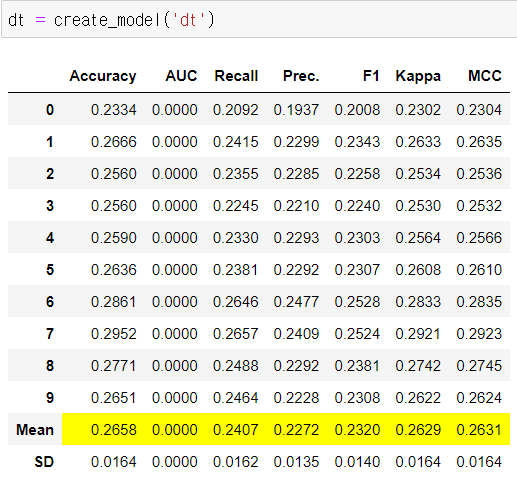

In [22]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.1988,0.0000,0.1720,0.1608,0.1671,0.1944,0.1948
1,0.2214,0.0000,0.2061,0.1763,0.1824,0.2184,0.2187
2,0.2063,0.0000,0.1874,0.1683,0.1745,0.2024,0.2027
3,0.2003,0.0000,0.1710,0.1653,0.1698,0.1969,0.1972
4,0.2018,0.0000,0.1769,0.1704,0.1725,0.1965,0.1974
5,0.2259,0.0000,0.1912,0.1908,0.1924,0.2193,0.2210
6,0.2244,0.0000,0.1894,0.1882,0.1889,0.2193,0.2200
7,0.2108,0.0000,0.1624,0.1732,0.1738,0.2040,0.2057
8,0.2244,0.0000,0.1904,0.1732,0.1845,0.2204,0.2207
9,0.2214,0.0000,0.1963,0.1674,0.1822,0.2174,0.2177


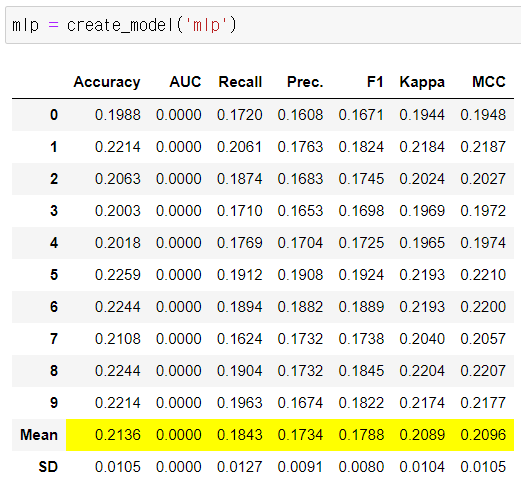

In [24]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3795,0.0000,0.3308,0.3038,0.3161,0.3721,0.3796
1,0.4021,0.0000,0.3690,0.3347,0.3394,0.3955,0.4016
2,0.4383,0.0000,0.4055,0.3588,0.3692,0.4325,0.4376
3,0.4127,0.0000,0.3702,0.3601,0.3595,0.4059,0.4131
4,0.4352,0.0000,0.3938,0.3728,0.3786,0.4297,0.4348
5,0.4202,0.0000,0.3822,0.3571,0.3638,0.4142,0.4192
6,0.4277,0.0000,0.3707,0.3401,0.3580,0.4217,0.4270
7,0.4142,0.0000,0.3627,0.3495,0.3541,0.4076,0.4141
8,0.4247,0.0000,0.3809,0.3504,0.3590,0.4186,0.4244
9,0.4187,0.0000,0.3774,0.3435,0.3535,0.4117,0.4198


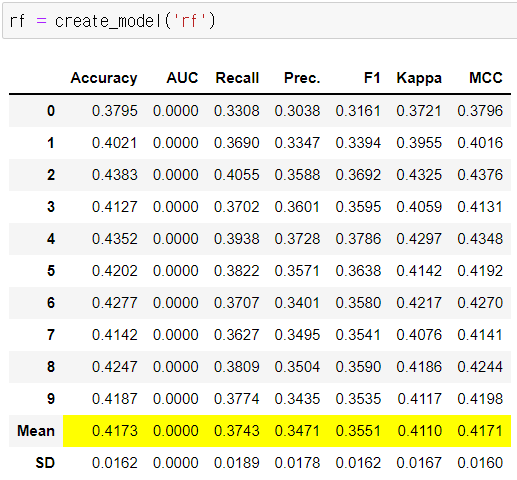

In [25]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0301,0.0000,0.0323,0.0219,0.0219,0.0268,0.0272
1,0.0346,0.0000,0.0020,0.0067,0.0072,0.0045,0.0067
2,0.0286,0.0000,0.0239,0.0270,0.0241,0.0259,0.0281
3,0.0196,0.0000,0.0022,0.0011,0.0020,-0.0071,-0.0098
4,0.0346,0.0000,0.0073,0.0094,0.0099,0.0046,0.0069
5,0.0346,0.0000,0.0020,0.0017,0.0033,0.0003,0.0004
6,0.0060,0.0000,0.0024,0.0002,0.0004,0.0015,0.0041
7,0.0346,0.0000,0.0295,0.0347,0.0320,0.0312,0.0324
8,0.0331,0.0000,0.0221,0.0405,0.0344,0.0305,0.0313
9,0.0301,0.0000,0.0294,0.0231,0.0233,0.0278,0.0282


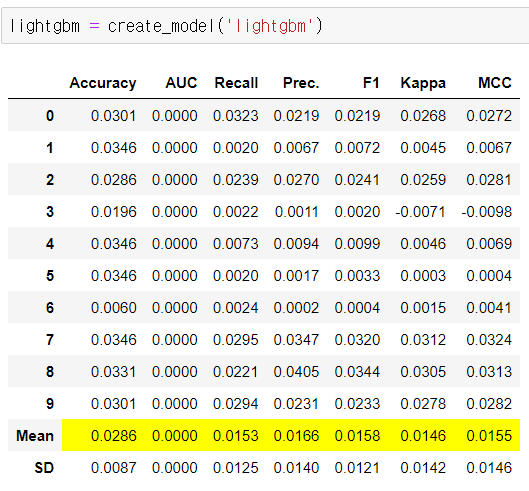

In [26]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.0346,0.0000,0.0053,0.0016,0.0030,-0.0025,-0.0059
1,0.0512,0.0000,0.0056,0.0045,0.0079,0.0137,0.0327
2,0.0392,0.0000,0.0019,0.0017,0.0033,0.0011,0.0030
3,0.0377,0.0000,0.0056,0.0017,0.0033,-0.0002,-0.0007
4,0.0407,0.0000,0.0040,0.0017,0.0032,0.0043,0.0115
5,0.0361,0.0000,0.0017,0.0016,0.0030,-0.0021,-0.0059
6,0.0422,0.0000,0.0039,0.0020,0.0037,0.0049,0.0119
7,0.0407,0.0000,0.0038,0.0018,0.0035,0.0028,0.0074
8,0.0407,0.0000,0.0037,0.0019,0.0035,0.0032,0.0081
9,0.0557,0.0000,0.0038,0.0052,0.0090,0.0174,0.0477


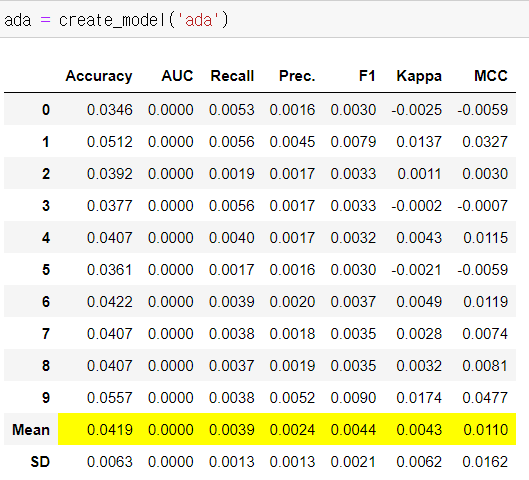

In [ ]:
catboost = create_model('catboost')

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:51:15
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Logistic Regression	‘lr’
K Nearest Neighbour	‘knn’
Naives Bayes	‘nb’
Decision Tree	‘dt’
SVM (Linear)	‘svm’
SVM (RBF)	‘rbfsvm’
Gaussian Process	‘gpc’
Multi Level Perceptron	‘mlp’
Ridge Classifier	‘ridge’
Random Forest	‘rf’
Quadratic Disc. Analysis	‘qda’
AdaBoost	‘ada’
Gradient Boosting Classifier	‘gbc’
Linear Disc. Analysis	‘lda’
Extra Trees Classifier	‘et’
Extreme Gradient Boosting	‘xgboost’
Light Gradient Boosting	‘lightgbm’
Cat Boost Classifier	‘catboost’

In [ ]:
compare_models(include=['et', 'rf', 'dt', 'mlp', 'ada', 'lightgbm', 'catboost', 'gbc', 'xgboost'])

# Extra Trees Classifier

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

et_models = {}

for year in tqdm(years):
    model = ExtraTreesClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=8)
    model.fit(train_data[year]['X'].iloc[:, :], train_data[year]['y'])
    et_models[year] = model

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:48<00:00, 27.20s/it]


## Testset 불러오기

마찬가지로 년도별로 DataFrame으로 불러온 후 리스트에 할당합니다.


In [11]:
TEST_PATH_2017 = DATA_PATH + "test/KNOW_2017_test.csv"
TEST_PATH_2018 = DATA_PATH + "test/KNOW_2018_test.csv"
TEST_PATH_2019 = DATA_PATH + "test/KNOW_2019_test.csv"
TEST_PATH_2020 = DATA_PATH + "test/KNOW_2020_test.csv"

TEST_PATHs = [TEST_PATH_2017, TEST_PATH_2018, TEST_PATH_2019, TEST_PATH_2020]

In [12]:
know_test = [pd.read_csv(path) for path in TEST_PATHs]
know_test[0].head() # 2017년도 test 샘플

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,...,의료,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt
0,0,3,4,2,2,3,3,1,0,3,...,0,0,0,0,0,0,0,0,0,4
1,1,5,5,3,5,5,5,5,5,4,...,0,0,0,1,0,0,0,0,0,3
2,2,5,5,5,4,5,4,1,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3,4,5,5,6,4,6,3,4,4,...,0,0,0,0,0,0,0,0,0,4
4,4,5,6,4,5,4,5,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
know_test[1].head()

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,의료,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt
0,9486,4,1,3,1,1,3,2,3,1,...,0,0,0,0,0,0,0,0,0,4
1,9487,5,4,5,5,5,5,3,3,3,...,0,0,0,0,0,0,0,0,0,3
2,9488,3,3,3,4,3,3,4,4,2,...,0,0,0,0,0,0,0,0,0,2
3,9489,4,4,4,4,2,3,3,4,4,...,0,0,0,0,0,0,0,0,0,4
4,9490,5,2,3,2,4,4,4,4,3,...,0,0,0,0,0,0,0,0,0,1


Train에 사용하였던 라벨인코더를 이용해서 카테고리를 정수로 변환합니다.

만약 Test변수가 Train 라벨인코더의 클래스에 없을경우 -1로 처리합니다

In [14]:
years = ['2017', '2018', '2019', '2020']

for year, df in zip(years, know_test):
    print(year)
    encoders = {}
    
    for col in df.columns:
        
        try:
            df[col] = df[col].map(int)
        except:
            encoder = year_encoder[year][col]
            df[col] = df[col].map(str)
            category_map = {category: idx for idx, category in enumerate(encoder.classes_)}
            df[col] = df[col].apply(lambda x: category_map[x] if x in category_map else -1) # train set에서 보지못한 카테고리변수 -1(UNK) 처리
            

2017
2018
2019
2020


### 데이터 처리 및 라벨인코딩 후 

In [15]:
know_train[0]['aq1_1'].value_counts()

3    3116
4    3007
2    1706
5    1072
1     585
Name: aq1_1, dtype: int64

In [16]:
know_test[0].head() # 2017년도 test 샘플

,idx,aq1_1,aq1_2,aq2_1,aq2_2,aq3_1,aq3_2,aq4_1,aq4_2,aq5_1,...,의료,한글,교재,시스템,회사원,이용,노트북,생산,것이므,ubda_cnt
0,0,3,4,2,2,3,3,1,0,3,...,0,0,0,0,0,0,0,0,0,4
1,1,5,5,3,5,5,5,5,5,4,...,0,0,0,1,0,0,0,0,0,3
2,2,5,5,5,4,5,4,1,0,1,...,0,0,0,0,0,0,0,0,0,2
3,3,4,5,5,6,4,6,3,4,4,...,0,0,0,0,0,0,0,0,0,4
4,4,5,6,4,5,4,5,1,0,1,...,0,0,0,0,0,0,0,0,0,1


## 테스트셋 추출 및 학습

ID 값을 제외한 나머지 데이터를 이용하여 모델에 넣어 추론합니다.

In [17]:
test_data = {}
for year, df in zip(years, know_test):
    print(year)
    train_columns = train_data[year]['X'].columns
    # print(train_columns)
    test_data[year] =  {'X': df[train_columns]}

2017
2018
2019
2020


In [18]:
for year in years:
    print(year)
    print(f"train: {train_data[year]['X'].shape} test: {test_data[year]['X'].shape}")

2017
train: (9486, 267) test: (9486, 267)
2018
train: (9072, 252) test: (9069, 252)
2019
train: (8555, 265) test: (8554, 265)
2020
train: (8122, 300) test: (8122, 300)


### 예측

In [19]:
et_predicts = [] 

for year in tqdm(years):
    pred = et_models[year].predict(test_data[year]['X'])
    et_predicts.extend(pred)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:24<00:00, 21.08s/it]


# 제출

In [20]:
submission = pd.read_csv('../data_0103/sample_submission.csv') # sample submission 불러오기

In [22]:
submission['knowcode'] = et_predicts

submission.to_csv('../submission_files/et_with_data0112.csv', index=False)